In [1]:
import iris
from iris.analysis import trajectory

url = "http://opendap.ccst.inpe.br/Misc/etopo2/ETOPO2v2c_f4.nc"
cube = iris.load_cube(url)

print(cube)

z / (1)                             (y: 5400; x: 10800)
     Dimension coordinates:
          y                           x        -
          x                           -        x
     Attributes:
          Conventions: COARDS
          actual_range: [-10791.   8440.]
          node_offset: 1
          source:                         -Rd -I2m -ZTLf                          
          title: 


In [2]:
def extract_bbox(cube, bbox=[-54, -20, -45, 0]):
    lon = iris.Constraint(x=lambda cell: bbox[0] <= cell <= bbox[1])
    lat = iris.Constraint(y=lambda cell: bbox[2] <= cell <= bbox[3])
    cube = cube.extract(lon & lat)
    return cube


cube = extract_bbox(cube)
print(cube)

z / (1)                             (y: 1350; x: 1020)
     Dimension coordinates:
          y                           x        -
          x                           -        x
     Attributes:
          Conventions: COARDS
          actual_range: [-10791.   8440.]
          node_offset: 1
          source:                         -Rd -I2m -ZTLf                          
          title: 


In [3]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection=projection))
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right  = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [4]:
%matplotlib inline

import numpy as np
import seawater as sw
from oceans import cm
import matplotlib.pyplot as plt

# Cadeia Vitória-Trindade

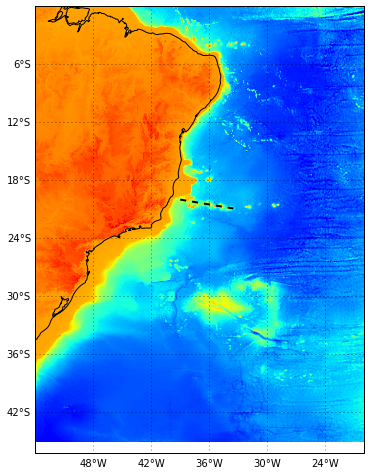

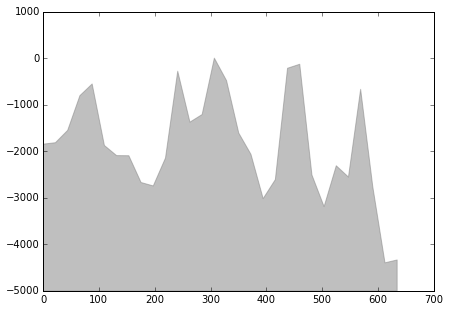

In [5]:
waypoints = [{'x': -39, 'y': -20}, {'x': -33, 'y': -21}]
traj = trajectory.Trajectory(waypoints, sample_count=30)

lon = [d['x'] for d in traj.sampled_points]
lat = [d['y'] for d in traj.sampled_points]

sampled_points = [('x', lon),
                  ('y', lat)]

section = trajectory.interpolate(cube, sampled_points)

lons = cube.coord('x').points
lats = cube.coord('y').points

dist = np.r_[0, sw.dist(lat, lon)[0].cumsum()]

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])
cs = ax.pcolormesh(lons, lats, cube.data)
l, = ax.plot(lon, lat, 'k--', linewidth=2)

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.fill_between(dist, section.data, y2=-5000,
                    color='gray', alpha=0.5, interpolate=True)

# Elevação de Rio Grande

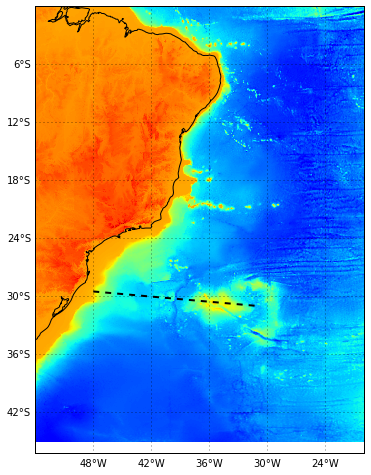

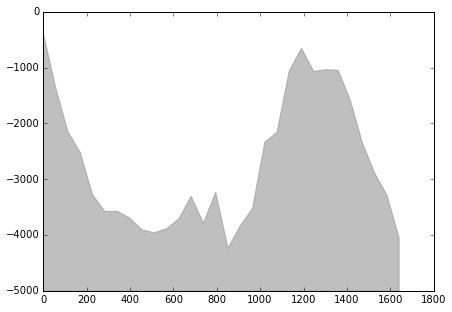

In [6]:
waypoints = [{'x': -48, 'y': -29.5}, {'x': -31, 'y': -31}]
traj = trajectory.Trajectory(waypoints, sample_count=30)

lon = [d['x'] for d in traj.sampled_points]
lat = [d['y'] for d in traj.sampled_points]

sampled_points = [('x', lon),
                  ('y', lat)]

section = trajectory.interpolate(cube, sampled_points)

lons = cube.coord('x').points
lats = cube.coord('y').points

dist = np.r_[0, sw.dist(lat, lon)[0].cumsum()]

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])
cs = ax.pcolormesh(lons, lats, cube.data)
l, = ax.plot(lon, lat, 'k--', linewidth=2)

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.fill_between(dist, section.data, y2=-5000,
                    color='gray', alpha=0.5, interpolate=True)

# algum outro

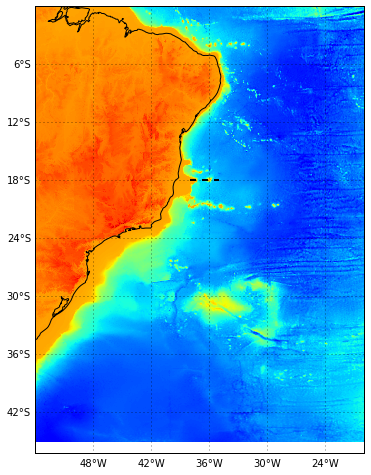

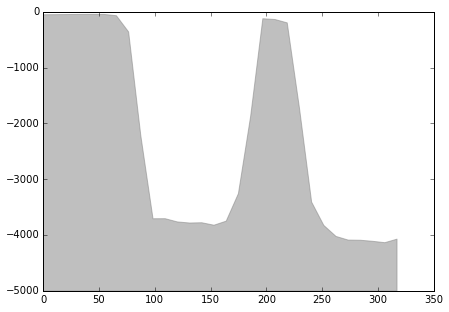

In [7]:
waypoints = [{'x': -38, 'y': -18}, {'x': -35, 'y': -18}]
traj = trajectory.Trajectory(waypoints, sample_count=30)

lon = [d['x'] for d in traj.sampled_points]
lat = [d['y'] for d in traj.sampled_points]

sampled_points = [('x', lon),
                  ('y', lat)]

section = trajectory.interpolate(cube, sampled_points)

lons = cube.coord('x').points
lats = cube.coord('y').points

dist = np.r_[0, sw.dist(lat, lon)[0].cumsum()]

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])
cs = ax.pcolormesh(lons, lats, cube.data)
l, = ax.plot(lon, lat, 'k--', linewidth=2)

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.fill_between(dist, section.data, y2=-5000,
                    color='gray', alpha=0.5, interpolate=True)